In [1]:
# import libraries
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt  
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [4]:
# loading the data
df = pd.read_csv(r'C:\Users\danie\emails.csv\emails.csv', encoding='latin1')


# Using 'latin1' encoding ensures that special characters (e.g., é, ñ, ü) in a CSV file are correctly interpreted and prevents
# errors like UnicodeDecodeError when the file contains characters incompatible with the default 'utf-8' encoding.


In [5]:
# sample of dataframe

styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#808080")]}
])
styled_df

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
# first half of dataset consists of spam email 
styled_head = df.head(5).style.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#808080"), ('font-weight', 'bold')]}
])

styled_head

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [8]:
# second half consists of ham(legitimate) email
styled_tail = df.tail(5).style.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#808080"), ('font-weight', 'bold')]}
])

styled_tail

,text,spam
5723,"Subject: re : research and development charges to gpg here it is ! - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000 07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - vince j kaminski 08 / 10 / 2000 02 : 25 pm to : vera apodaca / et & s / enron @ enron cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect subject : re : research and development charges to gpg vera , we shall talk to the accounting group about the correction . vince 08 / 09 / 2000 03 : 26 pm vera apodaca @ enron vera apodaca @ enron vera apodaca @ enron 08 / 09 / 2000 03 : 26 pm 08 / 09 / 2000 03 : 26 pm to : pinnamaneni krishnarao / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : research and development charges to gpg per mail dated june 15 from kim watson , there was supposed to have occurred a true - up of $ 274 . 7 in july for the fist six months of 2000 . reviewing july actuals , i was not able to locate this entry . would you pls let me know whether this entry was made , if not , when do you intend to process it . thanks .",0
5724,"Subject: re : receipts from visit jim , thanks again for the invitation to visit lsu . shirley will fedex the receipts tomorrow . vince "" james r . garven "" on 02 / 08 / 2000 07 : 00 : 50 pm to : vince j kaminski cc : subject : receipts from visit dear vince , thanks again for taking the time to visit . ? both faculty and students got a lot out of your presentations . i have a favor to ask concerning the expense reimbursement process . ? can you mail all travel and lodging receipts to my secretary joan payne at the following address : joan payne department of finance 2163 ceba louisiana state university baton rouge , la ? 70803 thanks , jim garven james r . garven william h . wright , jr . endowed chair for financial services department of finance 2158 ceba e . j . ourso college of business administration louisiana state university baton rouge , la ? 70803 - 6308 voice ( 225 ) 388 - 0477 ? | ? fax : ( 800 ) 859 - 6361 e - mail : ? jgarven @ lsu . edu home page : http : / / garven . lsu . edu vita : http : / / garven . lsu . edu / dossier . html research paper archive : http : / / garven . lsu . edu / research . html",0
5725,"Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so very much . vince is coming up to baylor on monday of next week and we will hash out our question list then . thanks john at 04 : 54 pm 11 / 6 / 00 - 0600 , you wrote : > good afternoon john , > > i just want to drop you a line to update you re : andy fastow . i have > confirmed a one hour interview slot with mr . fastow in monday , december 4 th > from > 11 : 00 a . m . - noon . this is in addition to your schedule interviews with > mr . lay and mr . skilling - outline below . > > if you have any questions , please do not hesitate to contact me at > 713 - 853 - 5670 . > > regards , > > cindy > > > - - - - - forwarded by cindy derecskey / corp / enron on 11 / 06 / 2000 04 : 49 pm - - - - - > > cindy > derecskey to : "" john martin "" > cc : vince j kaminski / hou / ect @ ect , christie patrick / hou / ect @ ect > 10 / 31 / 2000 subject : re : enron case study ( document link : cindy derecskey ) > 01 : 44 pm > > > > > > good afternoon john , > > i hope things are well with you . i am writing to update you on the status > of your meetings with andy fastow , ken lay and jeff skilling . i have > arranged the following meeting dates and times with ken lay and jeff > skilling , ( i am still trying to work with andy fastow ' s schedule ) : > > jeff skilling > december 4 th > 2 : 00 - 3 : 00 p . m . > > ken lay > december 4 th > 3 : 30 - 4 : 30 p . m . > > also , i will attempt to schedule the meeting with andy fastow for december > 4 th for convenience - this will also allow us to possibly schedule > additional meetings for the 5 th ( as needed ) . i

In [18]:
  # Rename the columns name
df.rename(columns = {'spam': 'target'}, inplace = True)

In [10]:
# checking missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [32]:
# check duplicate values
df.duplicated().sum()

33

In [12]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [13]:
# verify duplicate values removed
df.duplicated().sum()

0

In [14]:
df.shape

(5695, 2)

In [19]:
# EDA
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 75.97892888498683
percentage of 1 : 24.02107111501317


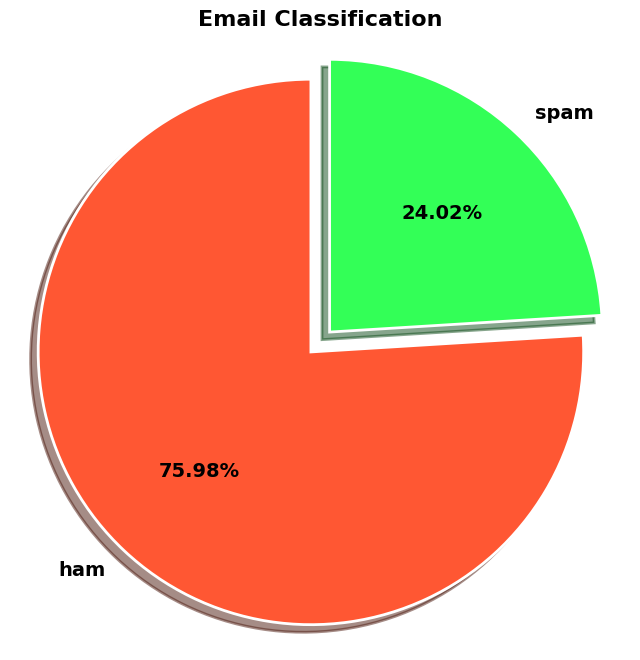

In [20]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
# dataset is not balanced.

In [21]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [23]:
# summary for legitimate emails
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [24]:
# summary for spam email
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


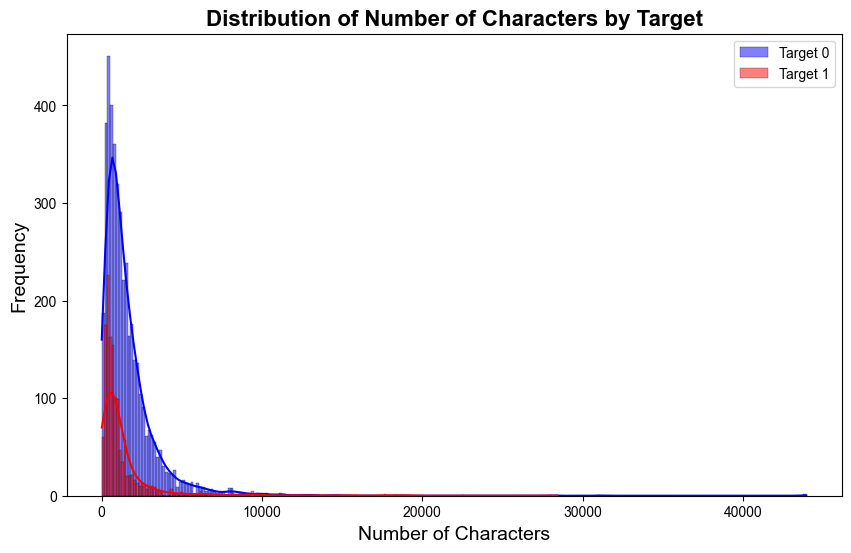

In [25]:
# character length distribution for ham and spam emails
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

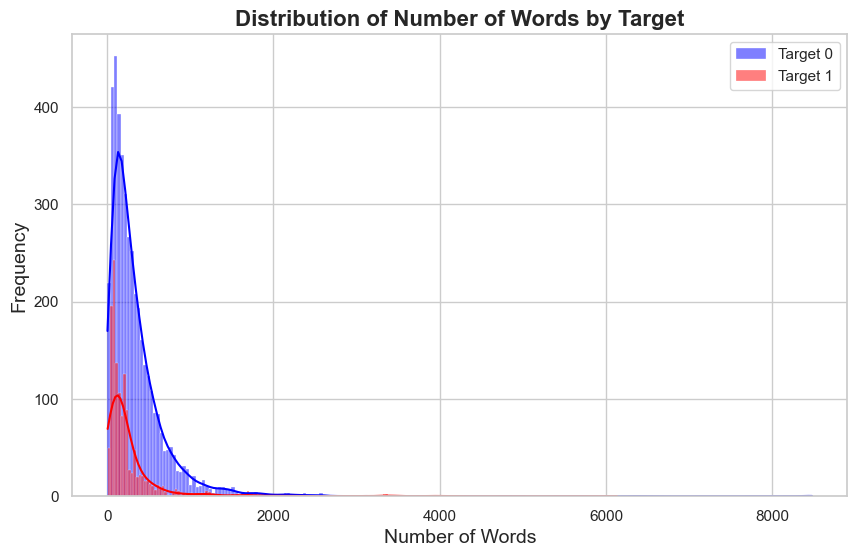

In [26]:
# wordcount distribution for ham and spam emails
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

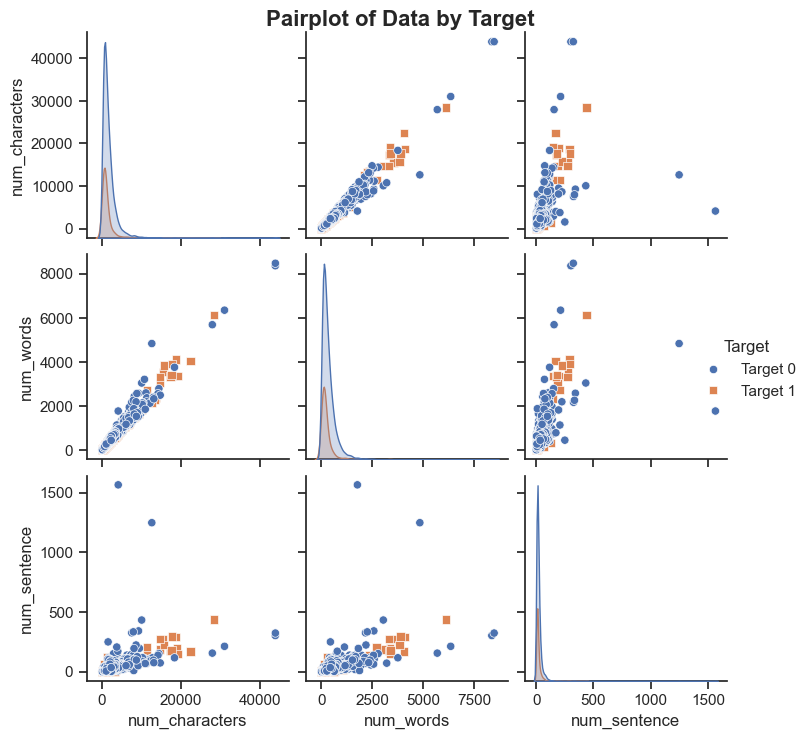

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

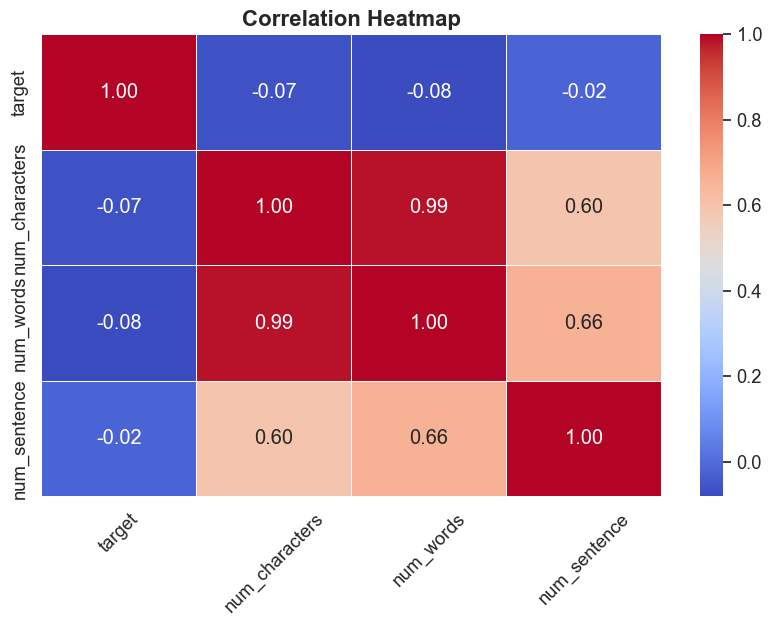

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

In [30]:
# DATA PREPROCESSING
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [31]:
transform_text('Subject: save your money buy getting this thing here  you have not tried cialls yet ?  than you cannot even imagine what it is like to be a real man in bed !  the thing is that a great errrectlon is provided for you exactly when you want .  ciaiis has a iot of advantaqes over viagra  - the effect iasts 36 hours !  - you are ready to start within just 10 minutes !  - you can mix it with aicohol ! we ship to any country !  get it riqht now ! . ')

'subject save money buy get thing tri ciall yet even imagin like real man bed thing great errrectlon provid exactli want ciaii iot advantaq viagra effect iast 36 hour readi start within 10 minut mix aicohol ship countri get riqht'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
transformed_df = df.head(5).style

transformed_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#808080"), ('font-weight', 'bold')]}
])

,text,target,num_characters,num_words,num_sentence,transformed_text
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1,1484,325,11,subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1,598,90,1,subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morristown superior deoxyribonucl clockwork tri hall incred mcdougal ye hepburn einsteinian earmark sapl boar duan plain palfrey inflex like huzzah pepperoni bedtim nameabl attir tri edt chronographi optima ye pirogu diffus albeit
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1,448,88,4,subject unbeliev new home made easi im want show homeown pre approv 454 169 home loan 3 72 fix rate offer extend uncondit credit way factor take advan

In [78]:
# MODEL TRAINING
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)


In [80]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

joblib.dump(tfid, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [39]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
# creating instances of various machine learning classifiers using specific hyperparameters
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [70]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [64]:
# train and return 5 evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc

In [63]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

for name, clfs in clfs.items():
    # Train the classifier and get the metrics
    current_accuracy, current_precision, current_recall, current_f1, current_auc = train_classifier(clfs, X_train, y_train, X_test, y_test)
    
    # Print the metrics
    print(f"\nFor: {name}")
    print(f"Accuracy: {current_accuracy:.4f}")
    print(f"Precision: {current_precision:.4f}")
    print(f"Recall: {current_recall:.4f}")
    print(f"F1 Score: {current_f1:.4f}")
    print(f"AUC: {current_auc:.4f}")
    
    # Store the metrics in the corresponding lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)
    auc_scores.append(current_auc)


For: SVC
Accuracy: 0.9903
Precision: 0.9929
Recall: 0.9690
F1 Score: 0.9808
AUC: 0.9833

For: KNN
Accuracy: 0.9772
Precision: 0.9783
Recall: 0.9310
F1 Score: 0.9541
AUC: 0.9620

For: NB
Accuracy: 0.9851
Precision: 0.9892
Recall: 0.9517
F1 Score: 0.9701
AUC: 0.9741

For: DT
Accuracy: 0.9236
Precision: 0.8048
Recall: 0.9241
F1 Score: 0.8604
AUC: 0.9238

For: LR
Accuracy: 0.9710
Precision: 0.9707
Recall: 0.9138
F1 Score: 0.9414
AUC: 0.9522

For: RF
Accuracy: 0.9824
Precision: 0.9927
Recall: 0.9379
F1 Score: 0.9645
AUC: 0.9678

For: Adaboost
Accuracy: 0.9508
Precision: 0.9606
Recall: 0.8414
F1 Score: 0.8971
AUC: 0.9148

For: Bgc
Accuracy: 0.9658
Precision: 0.9404
Recall: 0.9241
F1 Score: 0.9322
AUC: 0.9521

For: ETC
Accuracy: 0.9833
Precision: 0.9927
Recall: 0.9414
F1 Score: 0.9664
AUC: 0.9695

For: GBDT
Accuracy: 0.9561
Precision: 0.9651
Recall: 0.8586
F1 Score: 0.9088
AUC: 0.9240

For: xgb
Accuracy: 0.9886
Precision: 0.9632
Recall: 0.9931
F1 Score: 0.9779
AUC: 0.9901


In [65]:
# Sample emails to test
test_emails = [
    "Congratulations! You've won a $1000 gift card. Click here to claim now.",
    "Hi, please find the attached report and let me know your thoughts.",
    "URGENT: Update your account information immediately!",
    "Reminder: Meeting at 10 AM tomorrow."
]

# Transform the test emails using the same TF-IDF vectorizer
test_emails_transformed = tfid.transform(test_emails).toarray()

# Choose the best model (based on the model evaluation it is svc)
best_model = svc  

# Predict whether the emails are spam or not
predictions = best_model.predict(test_emails_transformed)

# Output the results
for email, prediction in zip(test_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction == 1 else 'Not Spam'}\n")

Email: Congratulations! You've won a $1000 gift card. Click here to claim now.
Prediction: Spam

Email: Hi, please find the attached report and let me know your thoughts.
Prediction: Not Spam

Email: URGENT: Update your account information immediately!
Prediction: Spam

Email: Reminder: Meeting at 10 AM tomorrow.
Prediction: Not Spam



In [66]:
# Evaluate on the test data
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
test_precision = precision_score(y_test, best_model.predict(X_test))
test_recall = recall_score(y_test, best_model.predict(X_test))
test_f1 = f1_score(y_test, best_model.predict(X_test))
test_auc = roc_auc_score(y_test, best_model.predict(X_test))

# Print the evaluation metrics
print("Test Data Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC: {test_auc:.4f}")

Test Data Evaluation:
Accuracy: 0.9903
Precision: 0.9929
Recall: 0.9690
F1 Score: 0.9808
AUC: 0.9833


In [73]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

Learning Curve for SVC


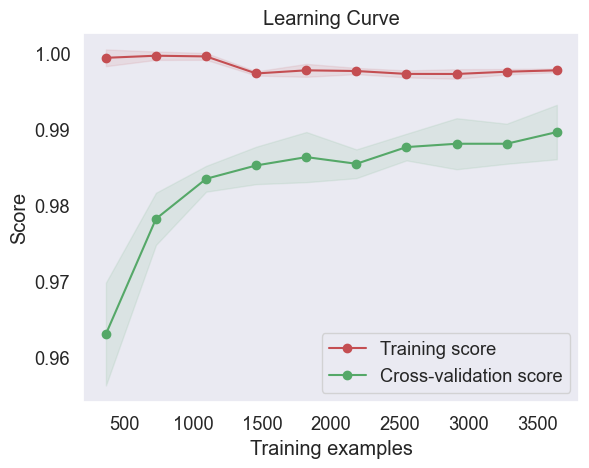

Learning Curve for KNN


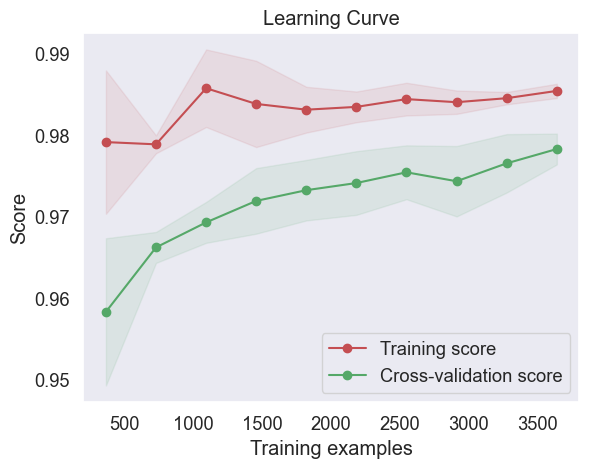

Learning Curve for NB


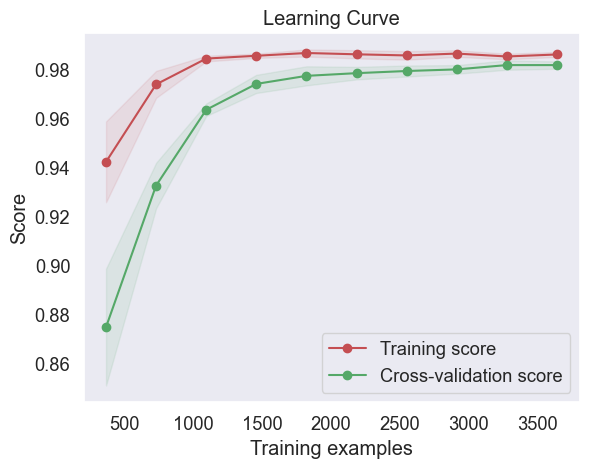

Learning Curve for DT


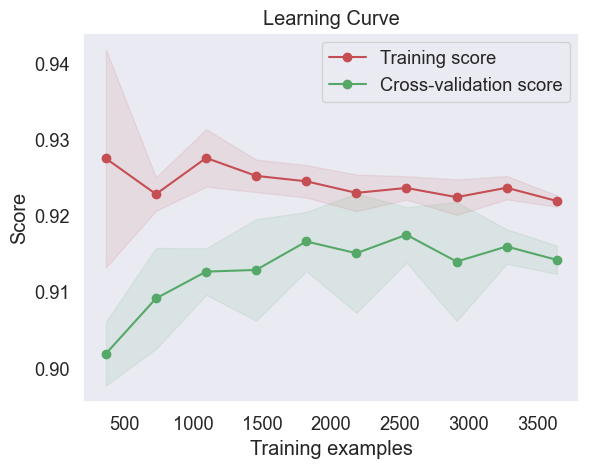

Learning Curve for LR


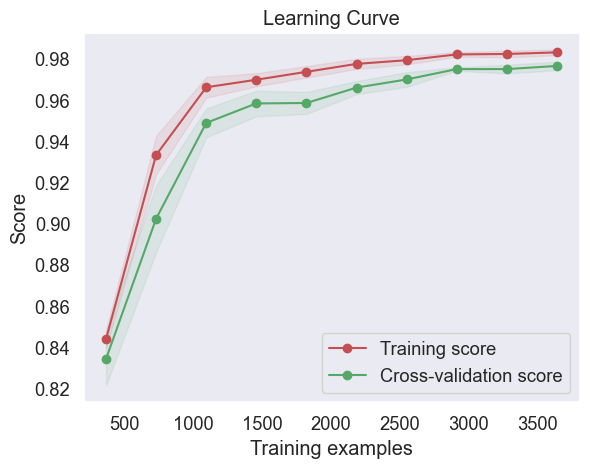

Learning Curve for RF


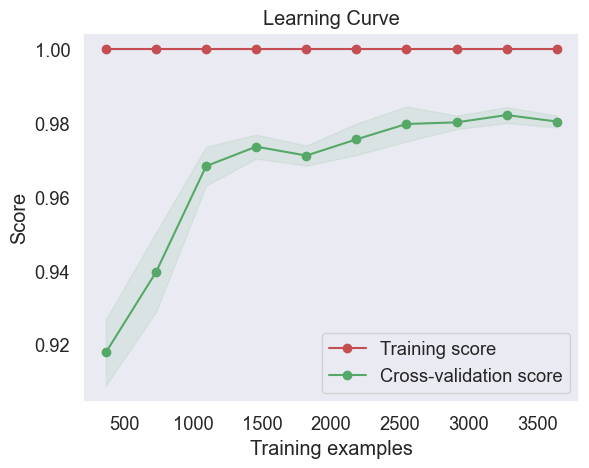

Learning Curve for Adaboost


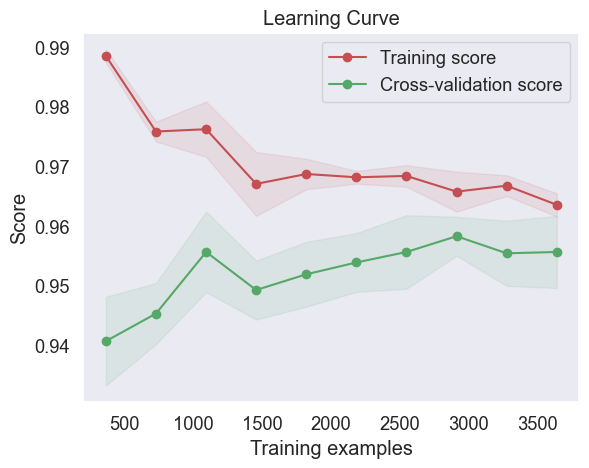

Learning Curve for Bgc


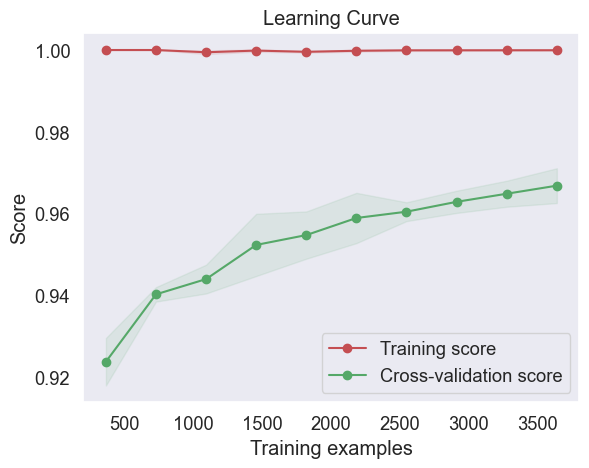

Learning Curve for ETC


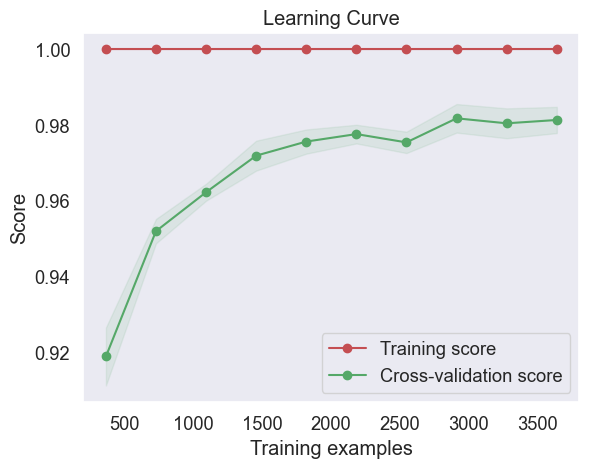

Learning Curve for GBDT


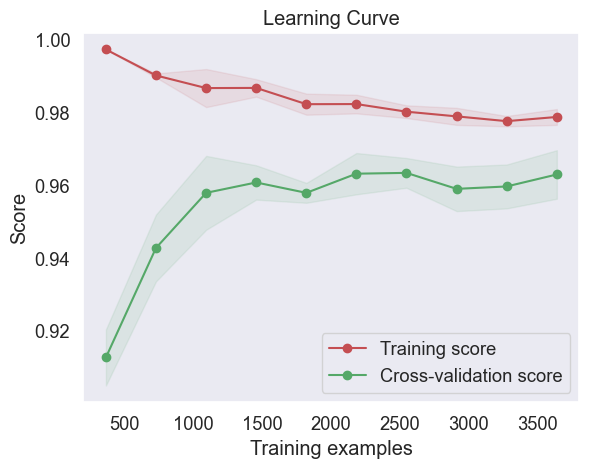

Learning Curve for xgb


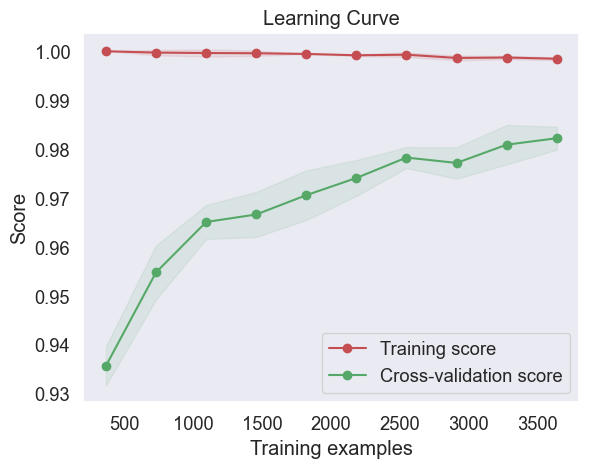

In [74]:
for name, clf in clfs.items():
    print(f"Learning Curve for {name}")
    plot_learning_curve(clf, X_train, y_train)

In [ ]:
# slight overfitting.

In [76]:
import joblib

# Save the best model
joblib.dump(best_model, 'spam_email_detector.joblib')

['spam_email_detector.joblib']